# ------------------- Préambule -------------------

In [2]:

import os, pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

PGURL = os.getenv("SUPABASE_DB_URL")  # défini dans .env
engine = create_engine(PGURL)

listings = pd.read_sql("SELECT price, minimum_nights, number_of_reviews, room_type "
                       "FROM listings", engine)

# ------------------- 1. Statistiques descriptives -------------------

In [3]:

desc = listings[["price", "minimum_nights", "number_of_reviews"]].describe()
display(desc)

,price,minimum_nights,number_of_reviews
count,9772.000000,9772.000000,9772.000000
mean,134.289705,22.648588,39.402681
std,298.955831,32.962226,72.574397
min,0.000000,1.000000,0.000000
25%,60.000000,2.000000,1.000000
50%,93.000000,31.000000,9.000000
75%,148.000000,31.000000,45.000000
max,13294.000000,365.000000,986.000000


# ------------------- 2. Histogramme des prix (global) ---------------

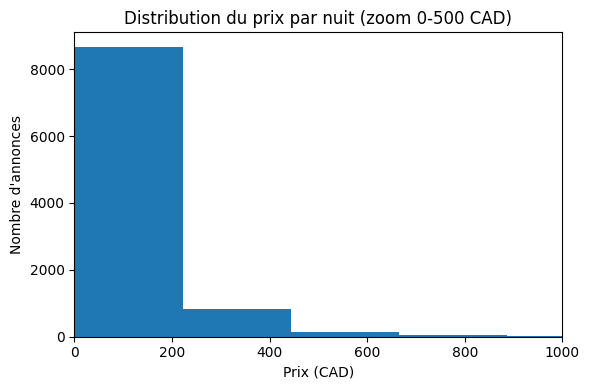

In [14]:
plt.figure(figsize=(6,4))
listings["price"].plot.hist(bins=60)
plt.title("Distribution du prix par nuit (zoom 0‑500 CAD)")
plt.xlabel("Prix (CAD)")
plt.ylabel("Nombre d'annonces")
plt.xlim(0, 1000)         
plt.tight_layout()
plt.show()

# ------------------- 3. Histogramme des prix par type de chambre ----

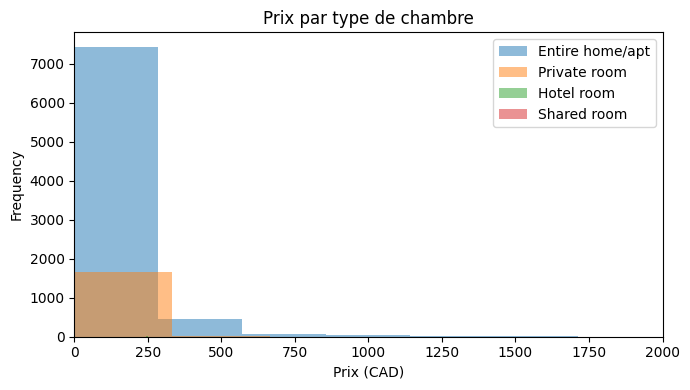

In [11]:
plt.figure(figsize=(7,4))
for rt in listings["room_type"].unique():
    subset = listings.loc[listings["room_type"] == rt, "price"]
    subset.plot.hist(bins=40, alpha=0.5, label=rt)
plt.title("Prix par type de chambre")
plt.xlabel("Prix (CAD)")
plt.legend()
plt.xlim(0, 2000)     
plt.tight_layout()
plt.show()

# ------------------- 4. Boxplot prix / room_type --------------------

<Figure size 600x400 with 0 Axes>

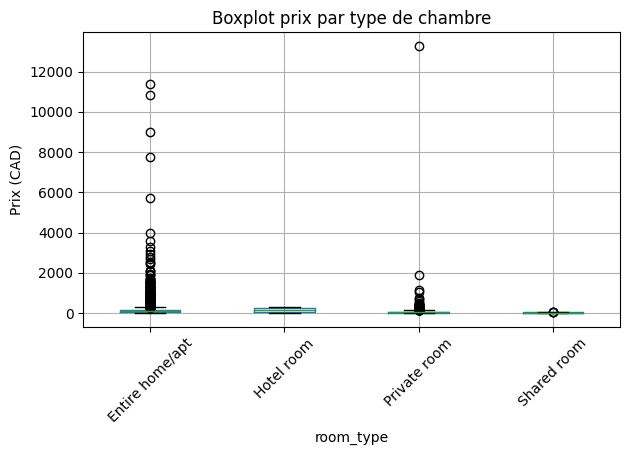

In [12]:
plt.figure(figsize=(6,4))
listings.boxplot(column="price", by="room_type")
plt.suptitle("")
plt.title("Boxplot prix par type de chambre")
plt.ylabel("Prix (CAD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------- 5. Observations (Markdown) ---------------------

In [16]:
from IPython.display import Markdown

Markdown("""
### Observations clés

- **Prix médian global** : `{:.0f} $`
- **Intervalle inter‑quartile** : {} $ – {} $
- **Part des annonces > 500 $** : {:.2%}
- **Minimum nights médian** : {} nuits
- Les `Entire home/apt` sont nettement plus chers que les `Private room`.

""".format(
    desc.loc["50%", "price"],
    int(desc.loc["25%", "price"]),
    int(desc.loc["75%", "price"]),
    (listings["price"] > 500).mean(),
    int(desc.loc["50%", "minimum_nights"])
))


### Observations clés

- **Prix médian global** : `93 $`
- **Intervalle inter‑quartile** : 60 $ – 148 $
- **Part des annonces > 500 $** : 2.15%
- **Minimum nights médian** : 31 nuits
- Les `Entire home/apt` sont nettement plus chers que les `Private room`.

